# Loan Prediction

Project Objectives

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_48666d84cd264f008ab8dadb68e43a71 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vSxsfEALoBcgRV8lsBODUn7UzKixGfxwpS8GlJk3pvWm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_48666d84cd264f008ab8dadb68e43a71.get_object(Bucket='loanpredicionmlproject-donotdelete-pr-mkdib2fzxyyxjq',Key='credit_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


In [4]:
df_data_1.shape

(100514, 19)

Data Cleaning:
Dealing with missing values 

In [5]:
m_v = df_data_1.isnull().sum()

In [6]:
m_v

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [7]:
m_v.sum()

105653

In [8]:
n_n = df_data_1.notnull().sum()

In [9]:
n_n

Loan ID                         100000
Customer ID                     100000
Loan Status                     100000
Current Loan Amount             100000
Term                            100000
Credit Score                     80846
Annual Income                    80846
Years in current job             95778
Home Ownership                  100000
Purpose                         100000
Monthly Debt                    100000
Years of Credit History         100000
Months since last delinquent     46859
Number of Open Accounts         100000
Number of Credit Problems       100000
Current Credit Balance          100000
Maximum Open Credit              99998
Bankruptcies                     99796
Tax Liens                        99990
dtype: int64

In [10]:
n_n.sum()

1804113

In [11]:
df_data_1.drop('Months since last delinquent', axis=1, inplace=True)

In [12]:
df_data_1.isnull().any()

Loan ID                      True
Customer ID                  True
Loan Status                  True
Current Loan Amount          True
Term                         True
Credit Score                 True
Annual Income                True
Years in current job         True
Home Ownership               True
Purpose                      True
Monthly Debt                 True
Years of Credit History      True
Number of Open Accounts      True
Number of Credit Problems    True
Current Credit Balance       True
Maximum Open Credit          True
Bankruptcies                 True
Tax Liens                    True
dtype: bool

In [13]:
df_data_1.dtypes

Loan ID                       object
Customer ID                   object
Loan Status                   object
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [14]:
Average_Credit_score = round(df_data_1['Credit Score'].mean(), 2)

In [15]:
Average_Credit_score

1076.46

In [16]:
df_data_1['Credit Score'].fillna(Average_Credit_score, inplace=True)

In [17]:
df_data_1.isnull().sum()

Loan ID                        514
Customer ID                    514
Loan Status                    514
Current Loan Amount            514
Term                           514
Credit Score                     0
Annual Income                19668
Years in current job          4736
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
Maximum Open Credit            516
Bankruptcies                   718
Tax Liens                      524
dtype: int64

In [18]:
for i in df_data_1.columns:
    if df_data_1[i].isnull().any()==True and df_data_1[i].dtypes=='float64':
        df_data_1[i].fillna(df_data_1[i].mean(), inplace=True)
        

In [19]:
df_data_1.isnull().sum()

Loan ID                       514
Customer ID                   514
Loan Status                   514
Current Loan Amount             0
Term                          514
Credit Score                    0
Annual Income                   0
Years in current job         4736
Home Ownership                514
Purpose                       514
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [20]:
for i in df_data_1.columns:
    if df_data_1[i].isnull().any()==True and df_data_1[i].dtypes=='object':
        df_data_1[i].fillna(df_data_1[i].mode()[0], inplace=True)

In [21]:
df_data_1.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [22]:
df_data_1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,1076.46,1378276.56,5 years,Rent,Debt Consolidation,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,0.00


In [23]:
df_data_1.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100514.00,100514.00,100514.00,100514.00,100514.00,100514.00,100514.00,100514.00,100514.00,100514.00,100514.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31702570.56,1323.20,969808.18,12143.82,7.00,5.00,0.48,375207.88,8362954.17,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,179916.00,711.00,932425.00,10245.84,13.50,8.00,0.00,113107.00,274516.00,0.00,0.00
50%,313852.00,733.00,1378241.00,16280.91,17.00,10.00,0.00,210900.00,470118.00,0.00,0.00
75%,528968.00,750.00,1509968.00,23959.47,21.60,14.00,0.00,366657.25,780428.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


Data Visualization for more insights on the data

<AxesSubplot:>

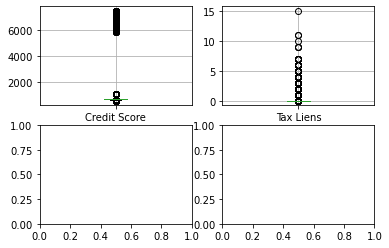

<Figure size 720x288 with 0 Axes>

In [24]:
fig, axes = plt.subplots(2, 2)
plt.figure(figsize=(10,4))
df_data_1.boxplot(column='Credit Score', ax=axes[0,0])
df_data_1.boxplot(column='Tax Liens', ax=axes[0,1]);

<AxesSubplot:ylabel='Current Loan Amount'>

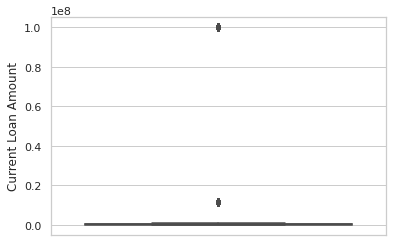

In [28]:
sns.set(style='whitegrid')
sns.boxplot(y=df_data_1['Current Loan Amount'])

In [26]:
print(np.where(df_data_1['Credit Score'] > 750))

(array([     1,      4,      5, ..., 100511, 100512, 100513]),)


In [33]:
df_data_1.drop('Tax Liens', axis='columns', inplace=True)
    

In [34]:
df_data_1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,1076.46,1378276.56,5 years,Rent,Debt Consolidation,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00


In [35]:
def top5_rows(data):
    return data.head()

In [36]:
def last5_rows(data):
    return data.tail()

In [37]:
last5_rows(df_data_1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
100509,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,11760447.39,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,18472.41,18.20,11.13,0.17,294637.38,760798.38,0.12
100510,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,11760447.39,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,18472.41,18.20,11.13,0.17,294637.38,760798.38,0.12
100511,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,11760447.39,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,18472.41,18.20,11.13,0.17,294637.38,760798.38,0.12
100512,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,11760447.39,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,18472.41,18.20,11.13,0.17,294637.38,760798.38,0.12
100513,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,11760447.39,Short Term,1076.46,1378276.56,10+ years,Home Mortgage,Debt Consolidation,18472.41,18.20,11.13,0.17,294637.38,760798.38,0.12
